In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
articles = pd.read_csv('../data/processed/articles_munged.csv', parse_dates=True)

In [4]:
articles.head()

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR
0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207
1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811
2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637
3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037
4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682


In [6]:
articles['BUREAU'].value_counts()

technology-and-telecom            5366
consumer-goods                    4480
health-care                       2977
industrials                       2359
investment-planning               2040
financials                        1978
energy-materials-and-utilities    1513
cryptocurrency                     754
markets                            581
real estate                        534
cannabis                           517
Name: BUREAU, dtype: int64

In [7]:
# set X 
X = articles['HEADLINE']

In [8]:
# examine X
X

0            2 under-the-radar tech stocks to buy in 2022 
1        does it matter that gamestop's split will be a...
2                       is amazon stock a buy this month? 
3                2 stocks that cut you a check each month 
4        is amazon or alphabet the better stock split i...
                               ...                        
23094               why affimed stock is heating up today 
23095    3 beaten-down growth stocks -- can they recover? 
23096           why shares of dingdong are volatile today 
23097    this cybersecurity stock could just be getting...
23098        2 reasons i'm still not investing in ibuying 
Name: HEADLINE, Length: 23099, dtype: object

In [9]:
# instantiate count vectorizer
cvect = CountVectorizer(stop_words='english', max_features=150)

In [10]:
# fit on headlinge
Xv = cvect.fit_transform(X)

In [11]:
Xv

<23099x150 sparse matrix of type '<class 'numpy.int64'>'
	with 64815 stored elements in Compressed Sparse Row format>

In [12]:
kmeans = KMeans(n_clusters = 10).fit(Xv)

In [12]:
# other libs to try - sci kit plot
# principle components-way to reduce dimension of data, visualize in two features along the principle componenets
# sckikitplot
# 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
pipe = Pipeline[('cvect', CountVectorizer()), ('kmeans', KMeans())
               
               
               
               ]

In [ ]:
pipe.fit(TEXT)

In [ ]:
y = pipe.predict(text)

In [ ]:
pca=PCA(n_components=2)

In [ ]:
X = pca.fit_transform(Xv.toarray())

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [ ]:
# could use plotly to hover or boque has hover tool- attach hover to a col of a df 

In [13]:
kmeans.labels_

array([0, 2, 5, ..., 8, 2, 3], dtype=int32)

In [14]:
articles['HEADLINE_GROUP'] = kmeans.labels_

In [15]:
articles.head()

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0
1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2
2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5
3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0
4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2


In [16]:
articles['HEADLINE_GROUP'] .value_counts()

3    7484
2    5110
0    3098
5    1935
1    1574
8    1066
7    1034
9     734
6     548
4     516
Name: HEADLINE_GROUP, dtype: int64

In [17]:
articles.groupby(['HEADLINE_GROUP', 'HEADLINE']).count()

Unnamed: 0  \
HEADLINE_GROUP HEADLINE                                                         
0              $1,500 invested in these 3 top robinhood stocks...           1   
               $1,500 invested in these 3 top tech stocks coul...           1   
               $300 a month in these 3 stocks could make you a...           2   
               $5,000 invested in these 3 stocks could make yo...           1   
               (yt) 4 stocks on my radar during this dip                    1   
...                                                                       ...   
9              yy (yy) q4 2021 earnings call transcript                     1   
               zebra technologies (zbra) q4 2021 earnings call...           1   
               zions bancorporation (zion) q4 2021 earnings ca...           1   
               zoetis (zts) q4 2021 earnings call transcript                1   
               zumiez (zumz) q4 2021 earnings call transcript               1   

                                                                   HEADLINE_LEN  \
HEADLINE_GROUP HEADLINE                                                           
0              $1,500 invested in these 3 top robinhood stocks...             1   
               $1,500 invested in these 3 top tech stocks coul...             1   
               $300 a month in these 3 stocks could make you a...             2   
               $5,000 invested in these 3 stocks could make yo...             1   
               (yt) 4 stocks on my radar during this dip                      1   
...                                                                         ...   
9              yy (yy) q4 2021 earnings call transcript                       1   
               zebra technologies (zbra) q4 2021 earnings call...             1   
               zions bancorporation (zion) q4 2021 earnings ca...             1   
               zoetis (zts) q4 2021 earnings call transcript                  1   
               zumiez (zumz) q4 2021 earnings call transcript                 1   

                                                                   PUBLISH_DATE  \
HEADLINE_GROUP HEADLINE                                                           
0              $1,500 invested in these 3 top robinhood stocks...             1   
               $1,500 invested in these 3 top tech stocks coul...             1   
               $300 a month in these 3 stocks could make you a...             2   
               $5,000 invested in these 3 stocks could make yo...             1   
               (yt) 4 stocks on my radar during this dip                      1   
...                                                                         ...   
9              yy (yy) q4 2021 earnings call transcript                       1   
               zebra technologies (zbra) q4 2021 earnings call...             1   
               zions bancorporation (zion) q4 2021 earnings ca...             1   
               zoetis (zts) q4 2021 earnings call transcript                  1   
               zumiez (zumz) q4 2021 earnings call transcript                 1   

                                                                   DAY_OF_WEEK  \
HEADLINE_GROUP HEADLINE                                                          
0              $1,500 invested in these 3 top robinhood stocks...            1   
               $1,500 invested in these 3 top tech stocks coul...            1   
               $300 a month in these 3 stocks could make you a...            2   
               $5,000 invested in these 3 stocks could make yo...            1   
               (yt) 4 stocks on my radar during this dip                     1   
...                                                                        ...   
9              yy (yy) q4 2021 earnings call transcript                      1   
               zebra technologies (zbra) q4 2021 earnings call...            1   
               zions bancorporati

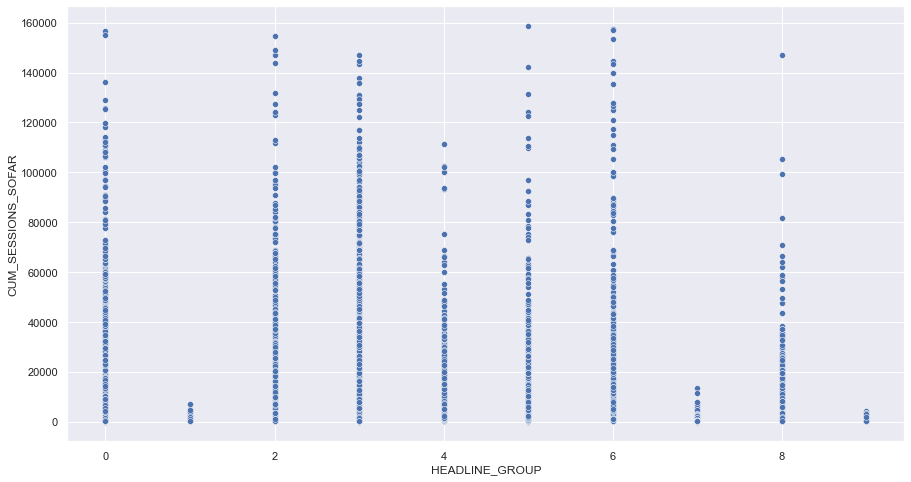

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles, x='HEADLINE_GROUP', y='CUM_SESSIONS_SOFAR' );

- the headline label does seem to have some relationship with the cumulative sessions

In [19]:
articles[articles['HEADLINE_GROUP']==1]

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
122,125,adecoagro sa (agro) q3 2020 earnings call tran...,53,2020-11-13,4,11,68400,Weekday,No,consumer-goods,transcript,AGRO earnings call for the period ending Septe...,65,1
175,185,atento s.a. (atto) q3 2020 earnings call trans...,52,2020-11-13,4,11,0,Weekday,No,industrials,transcript,ATTO earnings call for the period ending Septe...,54,1
214,231,azul s.a. (azul) q3 2020 earnings call transcr...,50,2020-11-16,0,11,55800,Weekday,No,financials,transcript,AZUL earnings call for the period ending Septe...,63,1
237,254,centrais electricas brasileiras s.a.- eletrobr...,88,2020-11-13,4,11,7200,Weekday,No,energy-materials-and-utilities,transcript,EBR earnings call for the period ending Septem...,33,1
241,259,vipshop holdings limited (vips) q3 2020 earnin...,65,2020-11-13,4,11,45000,Weekday,No,consumer-goods,transcript,VIPS earnings call for the period ending Septe...,190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,23899,rpm international (rpm) q3 2022 earnings call ...,57,2022-04-06,2,4,55800,Weekday,No,industrials,transcript,RPM earnings call for the period ending March ...,143,1
22366,24142,medtronic (mdt) q3 2022 earnings call transcript,49,2022-02-22,1,2,50400,Weekday,No,health-care,transcript,MDT earnings call for the period ending Decemb...,561,1
22666,24463,"c3.ai, inc. (ai) q3 2022 earnings call transcr...",50,2022-03-02,2,3,77400,Weekday,No,financials,transcript,AI earnings call for the period ending Decembe...,1979,1
22673,24471,take-two interactive (ttwo) q3 2022 earnings c...,61,2022-02-08,1,2,0,Weekday,No,technology-and-telecom,transcript,TTWO earnings call for the period ending Decem...,938,1


In [21]:
articles.to_csv('../data/processed/articles_headline_group.csv')

### Read in already categorized data, to practice charting

In [7]:
cats = pd.read_csv('../data/processed/articles_headline_group.csv')

In [8]:
cats.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2


In [9]:
cats[cats['HEADLINE_GROUP']==1]

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
122,122,125,adecoagro sa (agro) q3 2020 earnings call tran...,53,2020-11-13,4,11,68400,Weekday,No,consumer-goods,transcript,AGRO earnings call for the period ending Septe...,65,1
175,175,185,atento s.a. (atto) q3 2020 earnings call trans...,52,2020-11-13,4,11,0,Weekday,No,industrials,transcript,ATTO earnings call for the period ending Septe...,54,1
214,214,231,azul s.a. (azul) q3 2020 earnings call transcr...,50,2020-11-16,0,11,55800,Weekday,No,financials,transcript,AZUL earnings call for the period ending Septe...,63,1
237,237,254,centrais electricas brasileiras s.a.- eletrobr...,88,2020-11-13,4,11,7200,Weekday,No,energy-materials-and-utilities,transcript,EBR earnings call for the period ending Septem...,33,1
241,241,259,vipshop holdings limited (vips) q3 2020 earnin...,65,2020-11-13,4,11,45000,Weekday,No,consumer-goods,transcript,VIPS earnings call for the period ending Septe...,190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,22144,23899,rpm international (rpm) q3 2022 earnings call ...,57,2022-04-06,2,4,55800,Weekday,No,industrials,transcript,RPM earnings call for the period ending March ...,143,1
22366,22366,24142,medtronic (mdt) q3 2022 earnings call transcript,49,2022-02-22,1,2,50400,Weekday,No,health-care,transcript,MDT earnings call for the period ending Decemb...,561,1
22666,22666,24463,"c3.ai, inc. (ai) q3 2022 earnings call transcr...",50,2022-03-02,2,3,77400,Weekday,No,financials,transcript,AI earnings call for the period ending Decembe...,1979,1
22673,22673,24471,take-two interactive (ttwo) q3 2022 earnings c...,61,2022-02-08,1,2,0,Weekday,No,technology-and-telecom,transcript,TTWO earnings call for the period ending Decem...,938,1
